In [1]:
import pennylane as qml
import numpy as np

In [5]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def guess_the_unitary(unitary):
    qml.Hadamard(0)
    qml.ControlledQubitUnitary(unitary, control_wires=[0], wires=1)
    qml.Hadamard(0)

    return qml.probs(wires=0)

# Z gate 
U = qml.PauliZ.compute_matrix() 

# -Z gate
U = (-1)*qml.PauliZ.compute_matrix()

print(guess_the_unitary(U))


[0. 1.]


[1. 0.]


((1+0j), (-1+0j))

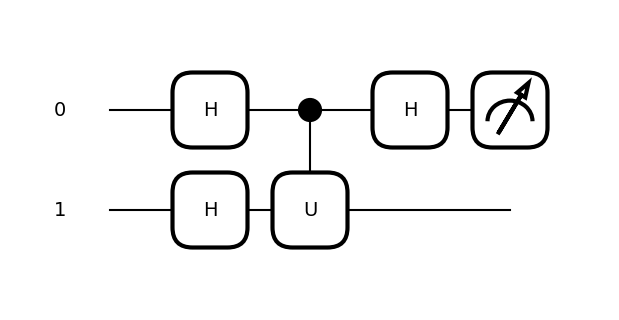

In [39]:
dev = qml.device("default.qubit", wires=2)
        
@qml.qnode(dev)
def phase_kickback_X(eigenvector):
    if eigenvector == "minus":
        qml.PauliX(1)
    qml.Hadamard(1)
    unitary = qml.PauliX.compute_matrix() 
    qml.Hadamard(0)
    qml.ControlledQubitUnitary(unitary, control_wires=[0], wires=1)
    qml.Hadamard(0)

    return qml.probs(wires=0) 

print(phase_kickback_X("plus"))
# print(phase_kickback_X("minus"))

# MODIFY EIGENVALUES BELOW 
eigenvalue_of_X_plus = np.round(np.exp((np.arcsin(np.sqrt(0))/np.pi)*2*np.pi*1j))
eigenvalue_of_X_minus = np.round(np.exp((np.arcsin(np.sqrt(1))/np.pi)*2*np.pi*1j))

qml.draw_mpl(phase_kickback_X)("plus")
eigenvalue_of_X_plus, eigenvalue_of_X_minus

$ H \otimes H = \frac{1}{2} (|00> + |01> + |10> + |11>) $

Conditional X (0,1) $ = \frac{1}{2} (|00> + |01> + |11> + |10>) $

(Apply H to Qubit 0)$ = \frac{1}{2} (|00> + |01> ) $

P(1) = 0; for x_plus

Similarly P(1) = 1 for x_minus 




In [78]:
dev = qml.device("default.qubit", wires=6)
estimation_wires = [0, 1, 2, 3]
target_wires = [4, 5]

def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2 
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm, gamma/norm, delta/norm])
    
    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)

@qml.qnode(dev)
def qpe(unitary):
    # MODIFY ALPHA, BETA, GAMMA, DELTA TO PREPARE EIGENVECTOR 
    prepare_eigenvector_superposition(0.5, 0.5, 0.5, 0.5)
    # prepare_eigenvector_superposition(1, 0, 0, 0)
    # prepare_eigenvector_superposition(0, 1, 0, 0)
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE
    
    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)

# UNCOMMENT THE LINE CORRESPONDING TO THE MATRIX YOU'D LIKE 
# TO ESTIMATE PHASES OF
# U = qml.CZ.compute_matrix()
# U = qml.CRZ.compute_matrix(0.4)    
U=qml.CRX.compute_matrix(1/3)
# U = qml.CRot.compute_matrix(0.9, 0.7, 0.4)

probs = sorted(zip(qpe(U), range(2**len(estimation_wires))), reverse=True)
value, prob = probs[1]
mystery_phase = 0 # MODIFY THIS

for idx,value in enumerate(np.binary_repr(prob)):
    if value == "1":
        mystery_phase += 2**-(idx+1)

print (f"Mystery phase = ", mystery_phase)

Mystery phase =  0.9375
